<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 527 Homework 2

Add your team member(s) name here.

Shuyi gin Wang<br>
Beck Addison<br>
Shivam Kaul

### Problem 0 (3 points)

## Part 1: The Gradient and its Curl

### Problem 1.1 (Exam Style)

The function provided to us is described as the following:<br>

$$f(x,y) = ysin(x) + y^2x - y^2$$<br>

In order to calculate the gradient of $f$, we evaluate its partial derivates in $x$ and $y$:
$$∇f(x,y) = (\frac{\partial f}{\partial x},\frac{\partial f}{\partial y})$$

$$\frac{\partial f}{\partial x} = ycos(x) + y^2 = g_x(x,y)$$ 

$$\frac{\partial f}{\partial y} = sin(x) + 2yx - 2y = g_y(x,y)$$

**Hence,**
$$∇f(x,y) =[g_x(x,y), g_y(x,y)] = [ycos(x) + y^2, sin(x) + 2yx - 2y]  $$

### Problem 1.2 (Exam Style)

In order to prove that the above gradient is irrotational, it must satisfy the following conditon:

$$\text{curl}\,\mathbf{g}(x, y) = \frac{\partial g_y}{\partial x}(x, y) - \frac{\partial g_x}{\partial y}(x, y) = 0$$<br>

$$\frac{\partial g_y}{\partial x}(x, y) = \frac{\partial (sin(x) + 2yx -2y)}{\partial x} = cos(x) + 2y --(1)$$<br>

$$\frac{\partial g_x}{\partial y}(x, y) = \frac{\partial (ycos(x) + y^2)}{\partial y} = cos(x) + 2y--(2) $$<br>

Substituting (1) and (2) in the Curl equation:
$$cos(x) + 2y - (cos(x) + 2y) = 0$$<br>

**Therefore, the given gradient is irrotational.**

## Part 2: Integrating the Gradient 

### Problem 2.1 (Exam-Style)

The asymmetric finite difference approximation of the gradients is given by the following equation:

\begin{eqnarray*}
g_x(i, j) &\approx& f(i, j+1) - f(i, j) \;\;\;\text{for}\;\;\; 0 \leq i < m
\;\;\;\text{and}\;\;\; 0 \leq j < n - 1 \\
g_y(i, j) &\approx& f(i+1, j) - f(i, j) \;\;\;\text{for}\;\;\; 0 \leq i < m - 1
\;\;\;\text{and}\;\;\; 0 \leq j < n \;.
\end{eqnarray*}<br>

We observe that for the gradient calculated along the X-direction at a particular pixel is essentially the difference between the given pixel value and the pixel immediately to its right. That is, only two pixels are necessary to compute the gradient at a specific point. 

Let's consider all pixels in the top row, $f(0,j)$ for $0\leq j < n-1$  (The last column need not be accounted for as there is no pixel available to its right). The gradient row, $g_x(0, j)$, thus is one column shorter than the image row. 

To obtain the gradient $g_x$ through convolution of $f$ with a kernel $h_x$, the kernel should take two immediate pixels and subtract the first pixel from the second. Keeping this in mind, the below $h_x$ satisfies our requirement:
$$h_x = \begin{bmatrix}1&-1\end{bmatrix}$$<br>

Why this is applicable in the convolution is because when the kernel is flipped both horizontally and vertically, it transforms to:
$$h_x = \begin{bmatrix}-1&1\end{bmatrix}$$<br>

And when convolving with $f$, we get (for any two pixels):
$$g_x(0,j) = \begin{bmatrix}f(0,j)&f(0,j+1)\end{bmatrix}*\begin{bmatrix}-1\\1\end{bmatrix} = f(0,j+1) - f(0,j)$$<br>
And this may be extended for all the rows to get the complete $g_x$.

Similarly, $g_y$ can be got with the convolution of $f$ with $h_y$, where:

$$h_y = \begin{bmatrix}1\\-1\end{bmatrix}$$

$$g_y(i,j) = \begin{bmatrix}-1&1\end{bmatrix}*\begin{bmatrix}f(i,j)\\f(i+1,j)\end{bmatrix}\ = f(i+1,j) - f(i,j)$$<br>

**Hence,**
$$h_x = \begin{bmatrix}1&-1\end{bmatrix}$$<br>
$$h_y = \begin{bmatrix}1\\-1\end{bmatrix}$$

And upon 'valid' convolution, the sizes (rows, columns) of the gradient matrices will be as follows:

$$g_x \rightarrow (m - 1 +1,n-2+1) = (m,n-1)$$
$$g_y \rightarrow (m - 2 +1,n-1+1) = (m-1,n)$$


### Problem 2.2 (Exam Style)

As per the finite difference approximation, we may also derive the following relationship:

\begin{eqnarray*}
  f(i, j+1)&\approx&f(i, j) + g_x(i, j) \;\;\;\text{for}\;\;\; 0 \leq i < m
\;\;\;\text{and}\;\;\; 0 \leq j < n - 1 \\
 f(i+1, j) &\approx&f(i, j) + g_y(i, j)  \;\;\;\text{for}\;\;\; 0 \leq i < m - 1
\;\;\;\text{and}\;\;\; 0 \leq j < n \;.
\end{eqnarray*}<br>

Using the above equations, we obtain the following set of equations to predict the values of pixels to reconstruct the image:<br>

$$f(0,j) = f(0,0) + \sum_{k=0}^{j-1}g_x(0,k); 0< j \leq n$$

This provides the prediction of pixels at the first row of the image. To obtain the pixels along the columns:

$$f(i,j) = f(0,j) + \sum_{L=0}^{i-1}g_y(L,j); 0< i \leq m$$


### Problem 2.3

In [ ]:
import numpy as np
from PIL import Image
from urllib.request import urlretrieve as retrieve
from os import path as osp
from matplotlib import pyplot as plt
%matplotlib inline


def display_signed_image(f):
    bounds = np.percentile(f, (1, 99))
    d = np.minimum(np.maximum(f, bounds[0]), bounds[1]).astype(float)
    max = np.max(np.abs(bounds))
    d = np.round((d + max) / (2. * max) * 255.).astype(np.uint8)
    plt.imshow(d, cmap='gray')
    plt.axis('off')


base_name, gradient_extension = 'eye', 'tif'
gradient_file_names = ['{}_{}.{}'.format(base_name, d, gradient_extension)
                       for d in ('x', 'y')]

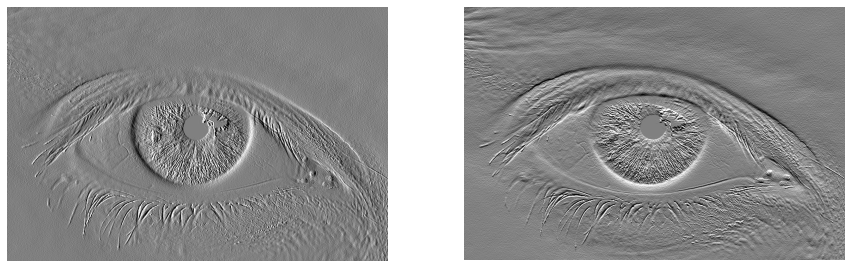

In [ ]:
for name in gradient_file_names:
    if not osp.exists(name):
        image_url = 'https://www2.cs.duke.edu/courses/spring21/' + \
                    'compsci527/homework/2/{}'.format(name)
        retrieve(image_url, name)

gradient = [np.array(Image.open(name)) for name in gradient_file_names]
plt.figure(figsize=(15, 6))
for plot, g in enumerate(gradient):
    plt.subplot(1, 2, plot + 1)
    display_signed_image(g)
plt.show()

f_00 = 164

In [ ]:
def integrate(g, first_pixel_value=0):
  I = np.zeros((g[0].shape[0],g[1].shape[1]))
  I[0] = g[0].cumsum()[0:I.shape[1]] + first_pixel_value
  for j in range(0,I.shape[1]):
    I[1:,j] = g[1].cumsum(axis = 0)[0:I.shape[0]].T[j] + I[0,j]

  return I

In [ ]:
I = integrate(gradient,f_00)

for i in range(0,I.shape[0]):
  for j in range(0,I.shape[1]):
    if I[i][j] > 255:
      I[i][j] = 255
    if I[i][j]<0:
      I[i][j] = 0

I =I.astype('uint8')

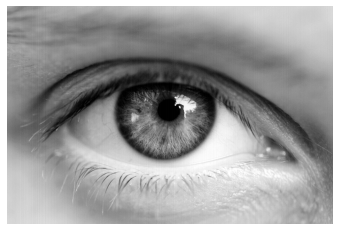

In [ ]:
plt.axis('off')
plt.imshow(I,cmap='gray')

In [1]:
I.shape

NameError: ignored

## Part 3: The Laplacian Operator

### Problem 3.1

### Problem 3.2

In [ ]:
import scipy.signal as ss


def x_range(sigma):
    k = np.ceil(3. * sigma)
    return np.arange(2 * k + 1) - k


def convolution(f, h, mode='valid'):
    assert f.ndim == h.ndim, 'inputs must have the same number of dimensions'
    g = ss.convolve(f, h, mode=mode, method='direct')
    return g.astype(f.dtype)


def show_plot(p, x=None, figure=True):
    if x is None:
        x = np.arange(len(p))
    if figure:
        plt.figure(figsize=(12, 6))
        plt.subplot()
    ax = plt.gca()
    plt.plot(x, p)
    if figure:
        plt.show()


def compare(fs, xs=None, show=show_plot):
    if xs is None:
        xs = [np.arange(len(f)) for f in fs]
    else:
        assert len(fs) == len(xs), 'inconsistent lists of ordinates and abscissas'
    n = len(fs)
    width = 12
    fig = plt.figure(figsize=(width, width / n))
    for plot, (x, y) in enumerate(zip(xs, fs)):
        if show.__name__ == 'show_mesh':
            fig.add_subplot(1, n, plot + 1, projection='3d')
        else:
            fig.add_subplot(1, n, plot + 1)
        show(y, x=x, figure=False)
    plt.show()



sigma = 3.5
tail, samples = 4 * sigma, 101
fine_x = np.linspace(-tail, tail, samples)

In [ ]:
# gauss, kernel_x = gaussian(sigma)
# fine_gauss = gaussian(sigma, fine_x)
# compare((gauss, fine_gauss), xs=(kernel_x, fine_x))

### Problem 3.3 (Exam Style)

### Problem 3.4


[//]: # (Rewrite the expressions here.)
$\ell(x) = $ 

$L(x, y) = $

$p(x) = $

$P(x, y)$

In [ ]:
def show_mesh(f, x=None, figure=True):
    assert f.shape[0] == f.shape[1], 'implemented only for square meshes'
    if x is None:
        x = np.arange(f.shape[0])
    xs, ys = np.meshgrid(x, x)
    if figure:
        plt.figure()
        plt.axes(projection='3d')
    ax = plt.gca()
    ax.plot_wireframe(xs, ys, f, color='gray', linewidths=0.5)
    if figure:
        plt.show()

In [ ]:
# laplace_kernel_1d, kernel_x = log(sigma)
# laplace_1d = log(sigma, x=fine_x)
# compare((laplace_kernel_1d, laplace_1d), xs=(kernel_x, fine_x))

# laplace_kernel_2d, kernel_x = log(sigma, dim=2)
# laplace_2d = log(sigma, x=fine_x, dim=2)
# compare((laplace_kernel_2d, laplace_2d), xs=(kernel_x, fine_x), show=show_mesh)

## Part 4: A Simple Edge Detection Method

### Problem 4.1 (Exam Style)

### Problem 4.2

In [2]:
david_name = 'david.png'
if not osp.exists(david_name):
    david_url = 'https://www2.cs.duke.edu/courses/spring21/' + \
                    'compsci527/homework/2/{}'.format(david_name)
    retrieve(david_url, david_name)
image = np.array(Image.open(david_name)).astype(float) / 255.


def show_image(img, width=6., figure=True):
    if figure:
        aspect = img.shape[0] / img.shape[1]
        height = width * aspect
        plt.figure(figsize=(width, height))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    if figure:
        plt.show()

NameError: ignored

In [3]:
# import pickle

# laplacian_file = 'laplacian.pkl'
# with open(laplacian_file, 'rb') as file:
#     laplace_kernel_2d = pickle.load(file)

### Problem 4.3 (Exam Style)

### Problem 4.4 (Exam Style)